# Model Algoritma Sistem Diagnosa Penyakit Diabetes pada Wanita

## Domain Proyek

Dalam proyek kali ini, saya memilih Kesehatan Diri dan Mental adapun latar belakang kenapa saya memilih domaian ini. antara lain :
- Bidang kesehatan sering dijumpai dalam kegiatan sehari-hari terutama dalam pelayanan kesehatan.
- Dalam pelayanan kesehatan juga sangat berkaitan dengan data-data pasien untuk mendiagnosis penyakit.
- Dari data-data pasien tersebut, kita dapat mengetahui bagaimana cara memastikan jenis penyakit diabetes dengan cepat dan tepat.


## Business Understanding

Diabetes adalah penyakit kronis yang terjadi baik ketika pankreas tidak menghasilkan cukup insulin atau ketika tubuh tidak dapat secara efektif menggunakan insulin atau hormon yang mengatur gula darah yang dihasilkannya. Berdasarkan data WHO pada tahun 2019, diabetes merupakan penyebab kematian kesembilan dengan perkiraan 1,5 juta kematian secara langsung disebabkan oleh diabetes. Melalui penelitian yang dilakukan oleh BMJ Diabetes Research & Care, wanita yang bekerja 45 jam atau lebih dalam seminggu dikaitkan dengan risiko diabetes.

Bayangkan jika Anda seorang petugas medis yang bertugas untuk mengecek data pasien di sebuah perusahaan yang bergerak di bidang jasa pelayanan kesehatan. Pekerjaan ini berhubungan dengan banyak data-data pasien, sehingga memerlukan waktu untuk memastikan pasien benar-benar terjangkit penyakit diabetes. Untuk efisiensi, kami ingin menerapkan automasi pada sistem dalam memprediksi penyakit diabetes dengan teknik predictive modelling.

### Problem Statement

- Teknik predictive apakah yang tepat untuk menentukan penyakit diabetes?
- Apakah dengan dibuatkan sistem diagnosa penyakit diabetes ini hasil akhirnya akan akurat untuk mendiagnosis penyakit ?

### Goals

- Membuat model machine learning yang dapat memprediksi penyakit diabetes dengan tepat.
- Mengetahui bagaimana hasil akhir sistem diagnosa penyakit diabetes.

In [1]:
# library yang di butuhkan
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score

In [2]:
# load the dataset
url = 'https://raw.githubusercontent.com/dandia14/project-capstone-team-csd-134/ml/dataset/diabetes.csv'
diabetes = pd.read_csv(url)
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
# Mengecek informasi dataset dengan fungsi info()
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
# Mengecek deskripsi statistik data dengan fitur describe()
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
# Mengetahui missing value
glucose = (diabetes.Glucose == 0).sum()
bloodPressure = (diabetes.BloodPressure == 0).sum()
skinThickness = (diabetes.SkinThickness == 0).sum()
insulin = (diabetes.Insulin == 0).sum()
bmi = (diabetes.BMI == 0).sum()
diabetesPedigreeFunction = (diabetes.DiabetesPedigreeFunction == 0).sum()
age = (diabetes.Age == 0).sum()

print("Nilai 0 di kolom Glucose ada: ", glucose)
print("Nilai 0 di kolom BloodPressure ada: ", bloodPressure)
print("Nilai 0 di kolom SkinThickness ada: ", skinThickness)
print("Nilai 0 di kolom Insulin ada: ", insulin)
print("Nilai 0 di kolom BMI ada: ", bmi)
print("Nilai 0 di kolom DiabetesPedigreeFunction ada: ", diabetesPedigreeFunction)
print("Nilai 0 di kolom Age ada: ", age)

Nilai 0 di kolom Glucose ada:  5
Nilai 0 di kolom BloodPressure ada:  35
Nilai 0 di kolom SkinThickness ada:  227
Nilai 0 di kolom Insulin ada:  374
Nilai 0 di kolom BMI ada:  11
Nilai 0 di kolom DiabetesPedigreeFunction ada:  0
Nilai 0 di kolom Age ada:  0


In [6]:
# Mengganti nilai 0 dengan NaN pada Glucose, Blood Pressure, Skin Thickness, Insulin, BMI
cols = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]
for col in cols:
    diabetes[col].replace(0,np.NaN,inplace=True)

In [7]:
# Mengganti nilai NaN dengan nilai mean sesuai target Outcome
for col in diabetes.columns:
    diabetes.loc[(diabetes["Outcome"]==0) & (diabetes[col].isnull()),col] = diabetes[diabetes["Outcome"]==0][col].mean()
    diabetes.loc[(diabetes["Outcome"]==1) & (diabetes[col].isnull()),col] = diabetes[diabetes["Outcome"]==1][col].mean()

In [8]:
# Mengecek kembali missing value
glucose = (diabetes.Glucose == 0).sum()
bloodPressure = (diabetes.BloodPressure == 0).sum()
skinThickness = (diabetes.SkinThickness == 0).sum()
insulin = (diabetes.Insulin == 0).sum()
bmi = (diabetes.BMI == 0).sum()

print("Nilai 0 di kolom Glucose ada: ", glucose)
print("Nilai 0 di kolom BloodPressure ada: ", bloodPressure)
print("Nilai 0 di kolom SkinThickness ada: ", skinThickness)
print("Nilai 0 di kolom Insulin ada: ", insulin)
print("Nilai 0 di kolom BMI ada: ", bmi)

Nilai 0 di kolom Glucose ada:  0
Nilai 0 di kolom BloodPressure ada:  0
Nilai 0 di kolom SkinThickness ada:  0
Nilai 0 di kolom Insulin ada:  0
Nilai 0 di kolom BMI ada:  0


In [9]:
# Mengecek kembali deskripsi statik data maka akan terlihat berbeda dengan sebelumnya
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.000000
mean,3.845052,121.697358,72.428141,29.247042,157.003527,32.44642,0.471876,33.240885,0.348958
std,3.369578,30.462008,12.106044,8.923908,88.860914,6.87897,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.20000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.50000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,28.000000,130.287879,32.05000,0.372500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,33.000000,206.846154,36.60000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.10000,2.420000,81.000000,1.000000


## Data Preparation

Standarisasi dengan menggunakan teknik StandarScaler dari library Scikitlearn

In [10]:
X = diabetes.drop(['Outcome'], axis=1)
y = diabetes['Outcome']

In [11]:
columns = X.columns
indexs = X.index
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6.0,148.0,72.0,35.0,206.846154,33.6,0.627,50.0
1,1.0,85.0,66.0,29.0,130.287879,26.6,0.351,31.0
2,8.0,183.0,64.0,33.0,206.846154,23.3,0.672,32.0
3,1.0,89.0,66.0,23.0,94.000000,28.1,0.167,21.0
4,0.0,137.0,40.0,35.0,168.000000,43.1,2.288,33.0


In [12]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
X = pd.DataFrame(X, columns=columns, index=indexs)
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.864020,-0.035389,0.645088,0.561272,0.167806,0.468492,1.425995
1,-0.844885,-1.205478,-0.531332,-0.027701,-0.300842,-0.850452,-0.365061,-0.190672
2,1.233880,2.013741,-0.696647,0.420825,0.561272,-1.330487,0.604397,-0.105584
3,-0.844885,-1.074081,-0.531332,-0.700491,-0.709475,-0.632253,-0.920763,-1.041549
4,-1.141852,0.502679,-2.680419,0.645088,0.123830,1.549727,5.484909,-0.020496


In [13]:
X.describe().round(9)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,0.000000
std,1.000652,1.000652,1.000652,1.000652,1.000652,1.000652,1.000652,1.000652
min,-1.141852,-2.552294,-4.002935,-2.494595,-1.610345,-2.072360,-1.189553,-1.041549
25%,-0.844885,-0.720952,-0.696647,-0.476227,-0.399801,-0.719533,-0.688969,-0.786286
50%,-0.250952,-0.154304,-0.035389,-0.139833,-0.300842,-0.057665,-0.300128,-0.360847
75%,0.639947,0.634076,0.625869,0.420825,0.561272,0.604202,0.466227,0.660206
max,3.906578,2.539328,4.097471,7.821507,7.758703,5.040895,5.883565,4.063716


Perhatikan tabel di atas, sekarang nilai mean = 0 dan standar deviasi = 1

In [14]:
# Membagi dataset menjadi data latih (train) dan data uji (test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, shuffle=False)

## Modeling

In [15]:
# membuat model Decision Tree
decisiontree = DecisionTreeClassifier() 
# melakukan pelatihan model terhadap data
decisiontree.fit(X_train, y_train)
y_pred_decisiontree = decisiontree.predict(X_train)

In [16]:
# membuat model SVM
svm = SVC()
# melakukan pelatihan model terhadap data
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_train)

In [17]:
# membuat model Random Forest Classifier
rfc = RandomForestClassifier()
# melakukan pelatihan model terhadap data
rfc.fit(X_train, y_train)
y_pred_rfc = rfc.predict(X_train)

In [18]:
# membuat model KNeighbors Classifier
knnc = KNeighborsClassifier()
# melakukan pelatihan model terhadap data
knnc.fit(X_train, y_train)
y_pred_knnc = knnc.predict(X_train)

In [19]:
# membuat model Ada Boost Classifier
adaboost = AdaBoostClassifier()
# melakukan pelatihan model terhadap data                        
adaboost.fit(X_train, y_train)
y_pred_adaboost = adaboost.predict(X_train)

## Evaluation

In [25]:
mse = pd.DataFrame(columns=['train', 'test'], index=['DecisionTree', 'SVM', 'Random Forest Classifier', 'KNeighbors Classifier', 'AdaBoostClassifier'])
model_dict = {'DecisionTree': decisiontree, 'SVM': svm, 'Random Forest Classifier': rfc, 'KNeighbors Classifier': knnc, 'AdaBoostClassifier':adaboost}
for name, model in model_dict.items():
    mse.loc[name, 'train'] = mean_squared_error(y_true=y_train, y_pred=model.predict(X_train))/1e3 
    mse.loc[name, 'test'] = mean_squared_error(y_true=y_test, y_pred=model.predict(X_test))/1e3
 
mse

,train,test
DecisionTree,0,0.00012987
SVM,0.000109121,0.000155844
Random Forest Classifier,0,0.00011039
KNeighbors Classifier,0.00013355,0.000181818
AdaBoostClassifier,6.84039e-05,0.000123377


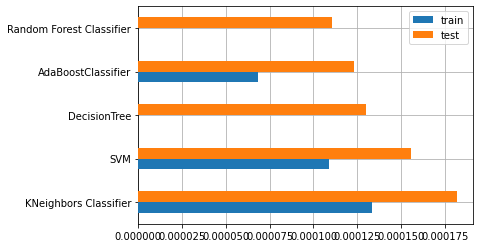

In [26]:
fig, ax = plt.subplots()
mse.sort_values(by='test', ascending=False).plot(kind='barh', ax=ax, zorder=3)
ax.grid(zorder=0)

Dari gambar di atas, terlihat bahwa, model Decision Tree, Random Forest Classifier, dan Ada Boost Classifier memberikan nilai eror yang paling kecil. Model inilah yang mungkin akan kita pilih sebagai model terbaik untuk melakukan prediksi penyakit diabetes.

In [29]:
prediksi = X_test.iloc[:3].copy()
pred_dict = {'y_true':y_test[:3]}
for name, model in model_dict.items():
    pred_dict['prediksi_'+name] = model.predict(prediksi)
 
pd.DataFrame(pred_dict)

,y_true,prediksi_DecisionTree,prediksi_SVM,prediksi_Random Forest Classifier,prediksi_KNeighbors Classifier,prediksi_AdaBoostClassifier
614,1,1,1,1,1,1
615,0,0,0,0,0,0
616,0,0,0,0,0,0


Dari gambar di atas, terlihat semua model memberikan hasil prediksi yang cukup tepat.

In [28]:
acc = pd.DataFrame(columns=['train', 'test'], index=['DecisionTree', 'SVM', 'Random Forest Classifier', 'KNeighbors Classifier', 'AdaBoostClassifier'])
model_dict = {'DecisionTree': decisiontree, 'SVM': svm, 'Random Forest Classifier': rfc, 'KNeighbors Classifier': knnc, 'AdaBoostClassifier':adaboost}
for name, model in model_dict.items():
    acc.loc[name, 'train'] = round(accuracy_score(y_true=y_train, y_pred=model.predict(X_train)), 3)
    acc.loc[name, 'test'] = round(accuracy_score(y_true=y_test, y_pred=model.predict(X_test)), 3)
 
acc

,train,test
DecisionTree,1,0.87
SVM,0.891,0.844
Random Forest Classifier,1,0.89
KNeighbors Classifier,0.866,0.818
AdaBoostClassifier,0.932,0.877


Dari gambar di atas, terlihat bahwa, model Decision Tree, Random Forest Classifier, dan Ada Boost Classifier memberikan nilai accuracy yang cukup baik.